<a href="https://colab.research.google.com/github/kikifana/Team_1_WeLead/blob/main/D01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting the City-Cycle Fuel Consumption in Miles
per Gallon of a Car**


*A Classification Problem*

D01: a python notebook containing any Exploration Data Analysis (EDA) you performed

In [ ]:
!pip install openpyxl


Transform excel file to csv file.

In [ ]:
import pandas as pd

xlsx_path = '/content/drive/MyDrive/mpg.data.xlsx'
csv_path = '/content/drive/MyDrive/mpg_data.csv'

df = pd.read_excel(xlsx_path, engine='openpyxl')

df.to_csv(csv_path, index=False)

print(f"CSV file saved at: {csv_path}")


CSV file saved at: /content/drive/MyDrive/mpg_data.csv


Columns of the dataframe:


*   mpg --> Miles per gallon: measures feul efficiency, higher values represent better fuel usage
*   cylinders --> number of cylinders in an engine: the higher the number the better the power but lower the fuel efficiency
*   displayments --> engine size: larger numbers indicate powerful engines
*   horsepower --> the output power of an engine
*   weight --> the more weight a car has the less the fuel efficiency is
*   acceleration --> the dt it takes a car to reach 0 to a certain number of speed: lower numbers indicate better acceleration
*   model_year --> the year the car was manufactured
*   origin --> where the car was manufactured.


1.   1: USA
2.   2: Europe
3.   3: Asia


*   car name --> the name of the car
*   Unnamed: 9 --> unknown column
*   Unnamed: 10 --> unknown column
*   Unnamed: 11 --> unknown column
*   Unnamed: 12 --> unknown column

**Remove:** Columns Unnamed: 9 through Unnamed: 12 do not contain any information as they are filled with NaNs and dropping them is necessary.



In [ ]:
df_csv = pd.read_csv(csv_path)
print(df_csv.head())

    mpg  cylinders  displayments  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name  Unnamed: 9  Unnamed: 10  \
0          70       1  chevrolet chevelle malibu         NaN          NaN   
1          70       1          buick skylark 320         NaN          NaN   
2          70       1         plymouth satellite         NaN          NaN   
3          70       1              amc rebel sst         NaN          NaN   
4          70       1                ford torino         NaN          NaN   

   Unnamed: 11 Unnamed: 12  
0          NaN         NaN  
1          NaN         NaN  
2          NaN         NaN  


In [ ]:
print("Dataset head:")
print(df.head(20))

Dataset head:
     mpg  cylinders  displayments  horsepower  weight  acceleration  \
0   18.0          8         307.0       130.0    3504          12.0   
1   15.0          8         350.0       165.0    3693          11.5   
2   18.0          8         318.0       150.0    3436          11.0   
3   16.0          8         304.0       150.0    3433          12.0   
4   17.0          8         302.0       140.0    3449          10.5   
5   15.0          8         429.0       198.0    4341          10.0   
6   14.0          8         454.0       220.0    4354           9.0   
7   14.0          8         440.0       215.0    4312           8.5   
8   14.0          8         455.0       225.0    4425          10.0   
9   15.0          8         390.0       190.0    3850           8.5   
10   NaN          4         133.0       115.0    3090          17.5   
11   NaN          8         350.0       165.0    4142          11.5   
12   NaN          8         351.0       153.0    4034          

**Dataset Info**

The dataset contains 406 rows (entries) and 13 columns (features)
Types of data in the dataset:
*   float64: 7 columns (e.g., mpg, displayments, horsepower).
*   int64: 4 columns (e.g., cylinders, weight, model year, origin).
*   object: 2 columns (car name and Unnamed: 12).

Most columns are complete (406 non-null values)
*   mpg: 398 non-null values (8 missing).
*   horsepower: 400 non-null values (6 missing).
*   Unnamed: 12: 1 non-null value (405 missing).
*   Unnamed: 9, Unnamed: 10, and Unnamed: 11: 0 non-null values (empty).

**Notes:**
1. Columns Unnamed: 9 through Unnamed: 12 do not contain any information as they are filled with NaNs and should be dropped during data cleaning.
2. Missing values in mpg and horsepower need to be addressed before we continue with the analysis.

In [ ]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displayments  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   1 non-null      object 
dtypes: float64(7), int64(4), object(2)
memory usage: 41.4+ KB


In [ ]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

print("\nMissing Values:")
print(missing_values[missing_values > 0])

print("\nMissing Percentage:")
print(missing_percent[missing_percent > 0])


Missing Values:
mpg              8
horsepower       6
Unnamed: 9     406
Unnamed: 10    406
Unnamed: 11    406
Unnamed: 12    405
dtype: int64

Missing Percentage:
mpg              1.970443
horsepower       1.477833
Unnamed: 9     100.000000
Unnamed: 10    100.000000
Unnamed: 11    100.000000
Unnamed: 12     99.753695
dtype: float64


Insights:


*   mpg: great variation, indicating from less eficient to more eficient cars
*   cylinders: most cars having 4 or 8 cylinders as we can observe from the percentiles.
*   displacements: big variation showcasing both small and big engines.
*   horsepower: ranges from 46.0 to 230.0 with a mean of 105.08 showcasing moderate power in most cars.
*  weight: average closer to the max, showing that most cars are heavier built.
*  acceleration: big variance showing different acceleration times.
*  model_year: cars manufactured between 1970 to 1982.
*  origin: from the percentiles we can see most cars manufactured in the USA (2)

Features like horsepower, weight, and displacements likely correlate with mpg.


This code provides a summary of both numerical and categorical columns to understand the dataset. df.describe() gives key statistics for numerical features, helping identify outliers and assess distribution. df.describe(include=['object']) focuses on categorical variables, showing unique values and frequency counts, which helps in handling missing data and deciding on encoding. These summaries guide preprocessing steps like scaling and encoding.

In [ ]:
print("\nNumerical Columns Summary:")
print(df.describe())

print("\nCategorical Columns Summary:")
print(df.describe(include=['object']))


Numerical Columns Summary:
              mpg   cylinders  displayments  horsepower       weight  \
count  398.000000  406.000000    406.000000  400.000000   406.000000   
mean    23.514573    5.475369    194.779557  105.082500  2979.413793   
std      7.815984    1.712160    104.922458   38.768779   847.004328   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    105.000000   75.750000  2226.500000   
50%     23.000000    4.000000    151.000000   95.000000  2822.500000   
75%     29.000000    8.000000    302.000000  130.000000  3618.250000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  Unnamed: 9  Unnamed: 10  \
count    406.000000  406.000000  406.000000         0.0          0.0   
mean      15.519704   75.921182    1.568966         NaN          NaN   
std        2.803359    3.748737    0.797479         NaN          NaN   
min        8.000000   70.000000    

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


Dropping columns 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'

In [ ]:
df = df.drop(columns=['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'])

Insights from Histograms:


*   mpg: observing a right-skewed distirbution with values ranging from 10 to 30.
*   cylinders: dominated by cars with 4, 6, and 8 cylinders, 4 being the most common
*   displacements: right-skewed distirbution, showing a concentration of smaller engine sizes under 200 cubic inches
*   horsepower: bimodal (multimodal with 2 distinct variables) distribution with peaks around 100 and 150 horsepower
*   weight: slightly right-skewed distirbution with most cars weighing between 2000 and 4000 pounds
*   acceleration: symmetric distribution with peak at around 15 seconds
*   model year: uniform distribution from 1970 to 1982 showing consistent representation of car model years
*   origin: the majority of cars are from the USA (1) with fewer from Europe (2) and Asia (3)


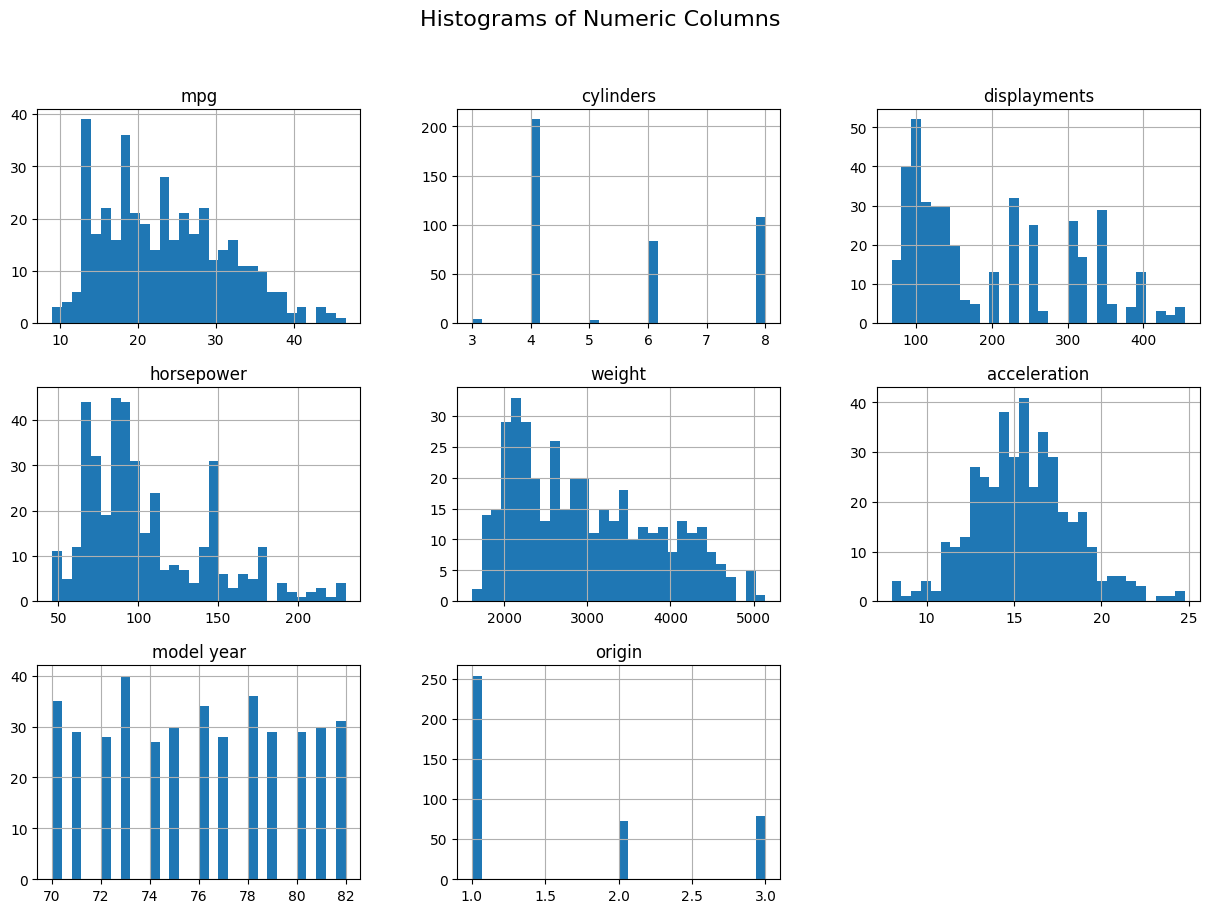

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Columns", fontsize=16)
plt.show()

Correlation heatmap insights:


*   mpg: strong negative correlations with cylinders (-0.78), displayments (-0.80), horsepower (-0.78), and weight (-0.83) showcasing that heavier cars with more powerful engines tend to have lower fuel efficiency.
*   cylinders, displatments, horsepower, and weight: highly correlated with each other showing that larger engines are typically paired with more cylinders and heavier cars.
*   acceleration: positively correlated with mpg (0.42) suggesting that cars with better acceleration often have higher fuel efficiency.
*   model year and mpg: Positive correlation (0.58) indicating that newer cars tend to be more fuel-efficient.
*   origin: positively correlated with mpg (0.56), suggesting that cars from Europe and Asia are generally more fuel-efficient than those from the USA.



We use Pearson correlation because it is the most commonly used method for measuring the linear relationship between variables. In Scikit-Learn, Pearson correlation is used as it effectively captures how one variable changes in relation to another. Pearson values range from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 means no correlation. In this case, we compute the correlation between the target variable (mpg) and all input features to understand which factors influence fuel efficiency the most.
  

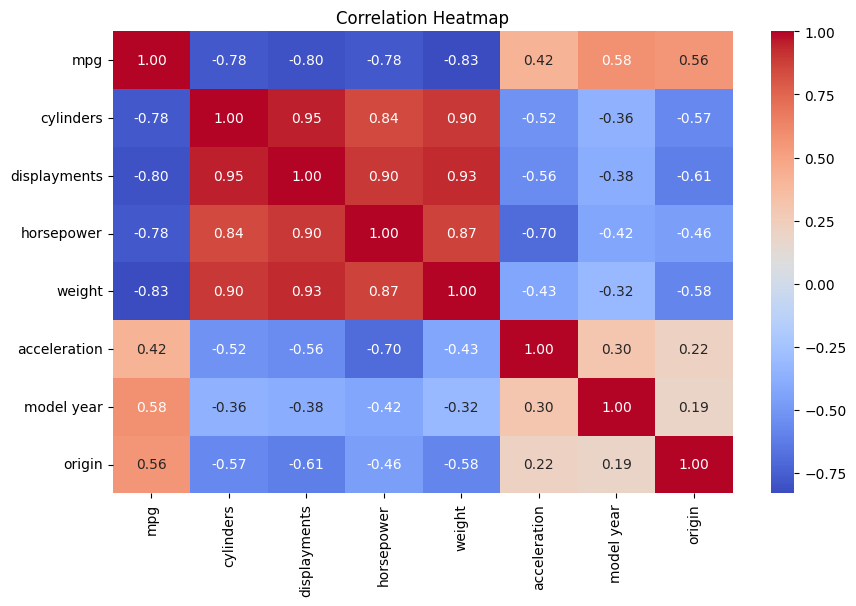

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

if numeric_df.empty:
    print("No numeric columns found for correlation heatmap.")
else:
    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.show()




Pairplot Insights:


*   mpg: negative correlations between mpg and weight, horsepower, and displayements. Heavier cars with larger engines and higher horsepower tend to have lower fuel efficiency. Positive correlationbetween mpg and acceleration indicating cars with better acceleration often have higher fuel efficiency.

*  engine-Related Features: weight, horsepower, and displayements are strongly positively correlated showing that heavier cars typically have larger engines and more horsepower.



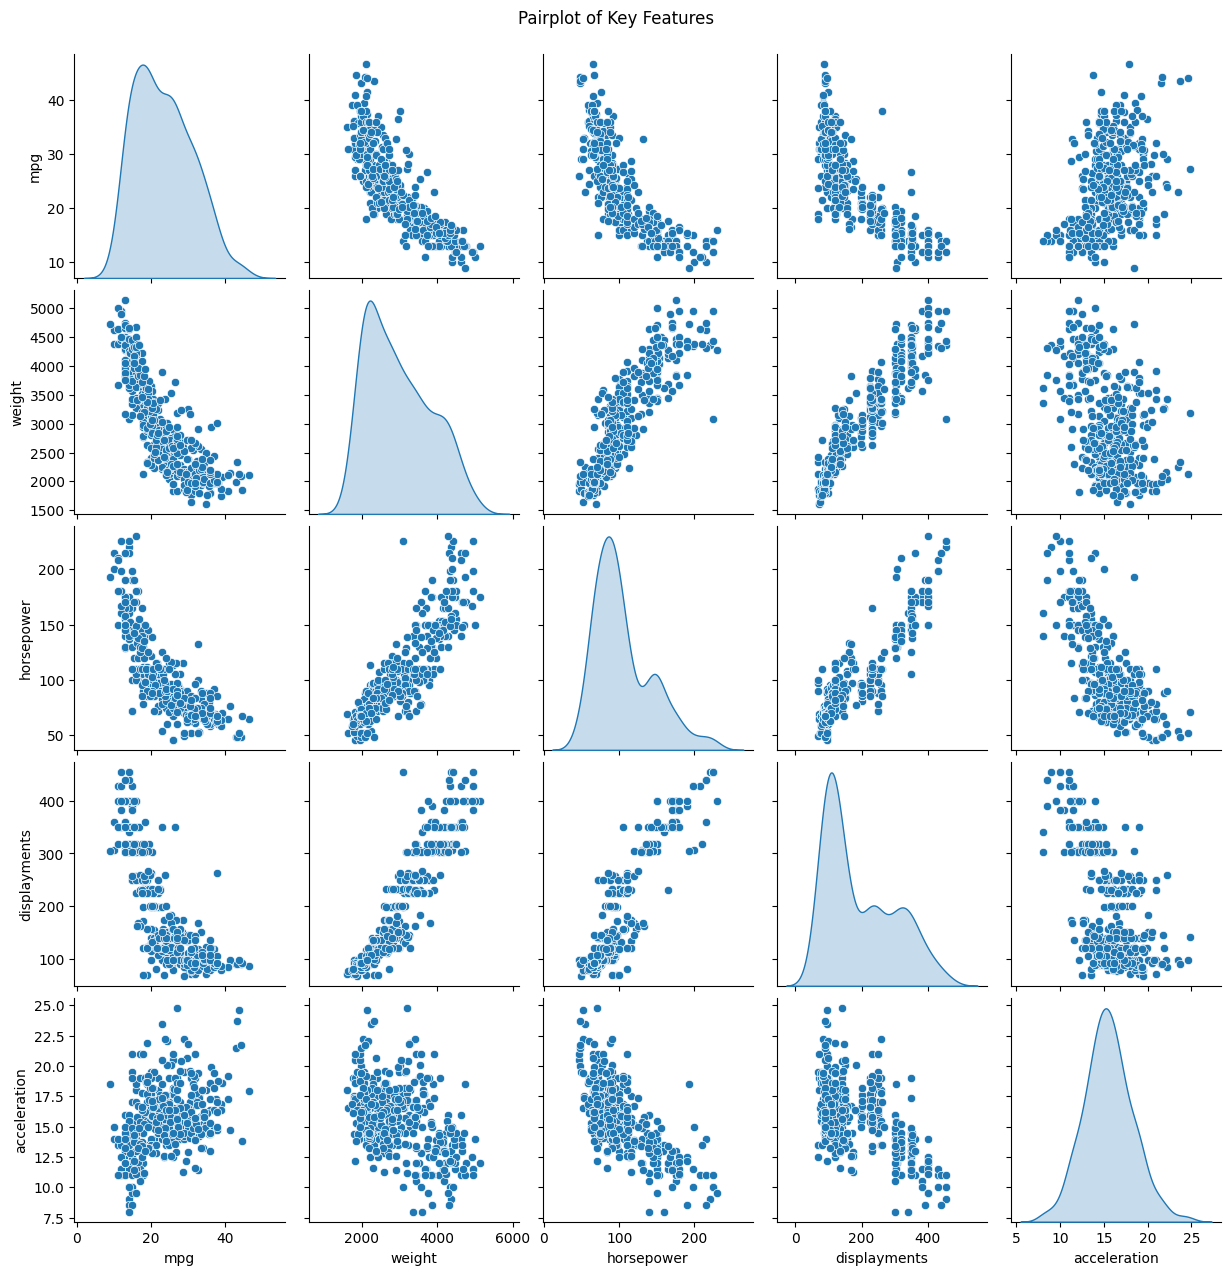

In [ ]:
sns.pairplot(df, vars=['mpg', 'weight', 'horsepower', 'displayments', 'acceleration'], diag_kind='kde')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

Inisghts from MPG vs. Cylinders Boxplot:


*   Cars with fewer cylinders have higher mpg values indicating better fuel efficiency
*   Cars with more cylinders have lower mpg values showcasing lower fuel efficiency due to larger engines
*   Outliers* are present for all categories especially in 4-cylinder cars with very high mpg


---


*Outliers are data points that significantly deviate from the typical range of
values






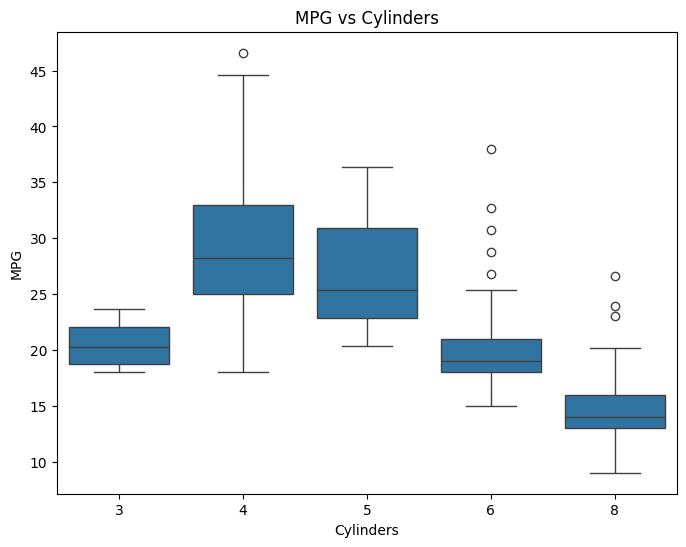

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='cylinders', y='mpg', data=df)
plt.title("MPG vs Cylinders")
plt.xlabel("Cylinders")
plt.ylabel("MPG")
plt.show()

Inisghts from MPG vs Origin:


*   Cars from Asia (3) have the highest mpg showing better fuel efficiency followed by Europe (2)
*   Cars from the USA (1) show lower mpg  reflecting larger engines and heavier cars.
*   Outliers may be present for both Europe and Asia showing a few cars with very high fuel efficiency.



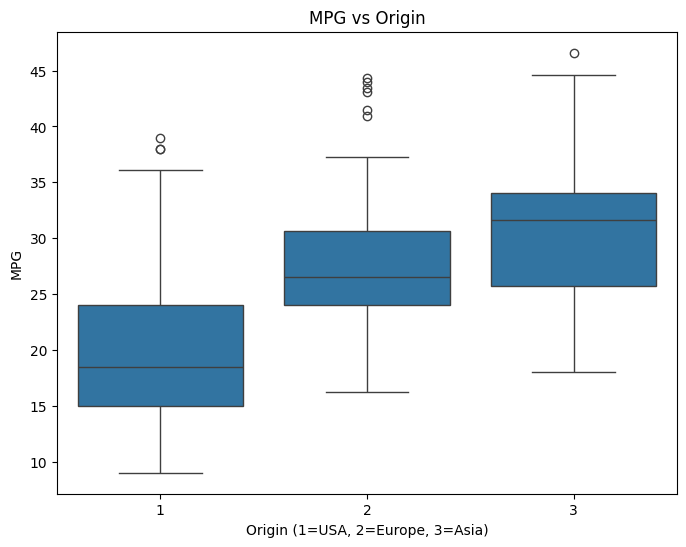

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='origin', y='mpg', data=df)
plt.title("MPG vs Origin")
plt.xlabel("Origin (1=USA, 2=Europe, 3=Asia)")
plt.ylabel("MPG")
plt.show()

Insights from MPG vs Model Year:


*   mpg increases across the years reflecting improvements in fuel efficiency over time
*   outliers may be present especially in early years as we can see from random higher mpg values.



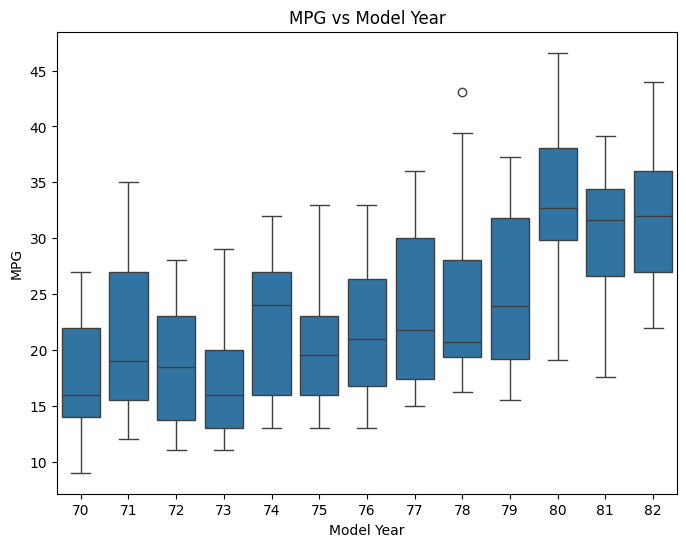

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='model year', y='mpg', data=df)
plt.title("MPG vs Model Year")
plt.xlabel("Model Year")
plt.ylabel("MPG")
plt.show()

 Upward trend: average mpg increased from around 17 in 1970 to over 30 by 1980, indicating technological progress

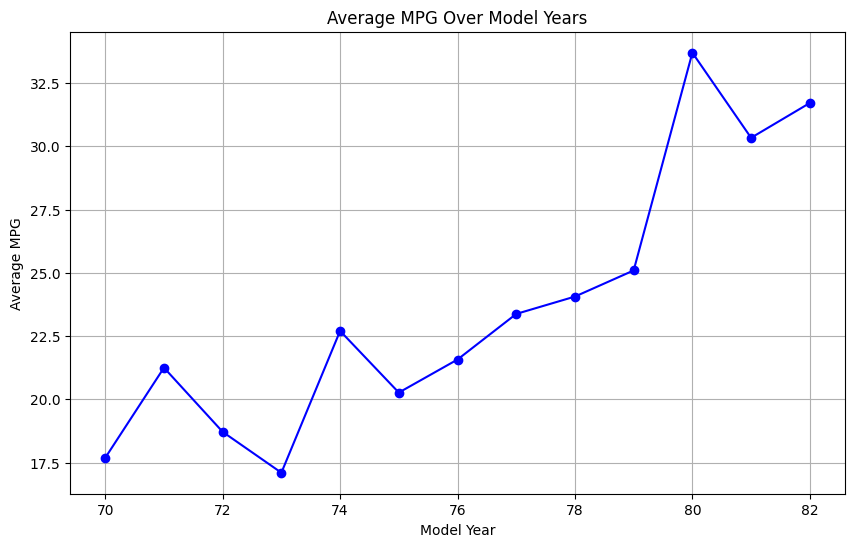

In [ ]:
avg_mpg_by_year = df.groupby('model year')['mpg'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_mpg_by_year.index, avg_mpg_by_year.values, marker='o', linestyle='-', color='b')
plt.title("Average MPG Over Model Years")
plt.xlabel("Model Year")
plt.ylabel("Average MPG")
plt.grid(True)
plt.show()

Lighter cars tend to have higher fuel efficiency (MPG), while heavier cars show a significant drop in MPG
Wider distribution in lighter cars: The Light and Medium weight categories have a broader MPG range, indicating a mix of highly efficient and less efficient cars, whereas Very Heavy cars have a much narrower distribution, suggesting consistently low MPG values.

<ipython-input-17-552da47be8ef>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='weight_category', y='mpg', data=df, inner='quartile', palette="coolwarm")


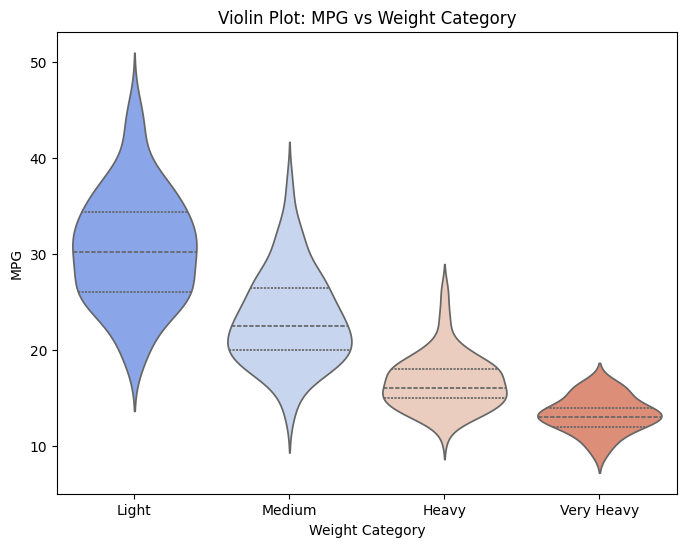

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df['weight_category'] = pd.cut(df['weight'], bins=4, labels=['Light', 'Medium', 'Heavy', 'Very Heavy'])
plt.figure(figsize=(8, 6))
sns.violinplot(x='weight_category', y='mpg', data=df, inner='quartile', palette="coolwarm")

plt.title("Violin Plot: MPG vs Weight Category")
plt.xlabel("Weight Category")
plt.ylabel("MPG")
plt.show()
